# **THE SPARKS FOUNDATION**

Author: VISHVA BHATT

TASK 2: Unsupervised learning - Kmeans Clustering


**Installing and importing modules** 

In [ ]:
pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
#loading the dataset
from google.colab import files
data_to_load = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df=pd.read_csv('Iris.csv')
df.drop(['Species'], axis = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**PREPROCESSING DATASET**

In [ ]:
scaled_features = df.copy() #creating copy of df
col_names = ['SepalLengthCm', 'SepalWidthCm','PetalWidthCm','PetalLengthCm'] #making list of specific columns
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values) #normalizing
features = scaler.transform(features.values)
scaled_features[col_names] = features #assigning those values to data
print(scaled_features)



      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1      -0.900681  ...     -1.312977     Iris-setosa
1      2      -1.143017  ...     -1.312977     Iris-setosa
2      3      -1.385353  ...     -1.312977     Iris-setosa
3      4      -1.506521  ...     -1.312977     Iris-setosa
4      5      -1.021849  ...     -1.312977     Iris-setosa
..   ...            ...  ...           ...             ...
145  146       1.038005  ...      1.447956  Iris-virginica
146  147       0.553333  ...      0.922064  Iris-virginica
147  148       0.795669  ...      1.053537  Iris-virginica
148  149       0.432165  ...      1.447956  Iris-virginica
149  150       0.068662  ...      0.790591  Iris-virginica

[150 rows x 6 columns]


**Finding the optimum number of clusters using the Elbow Method Graph**

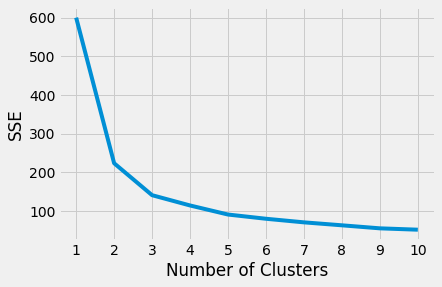

In [ ]:
sse=[] #creating list to find optimum number for cluster
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init= 'random',n_init= 10,max_iter= 300,random_state= 42)
  kmeans.fit(scaled_features[col_names])
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )

**Model Training and Cluster Prediction**

In [ ]:
y_kmeans = kmeans.fit_predict(scaled_features[col_names])
x=scaled_features[col_names]

**Cluster Visualization**

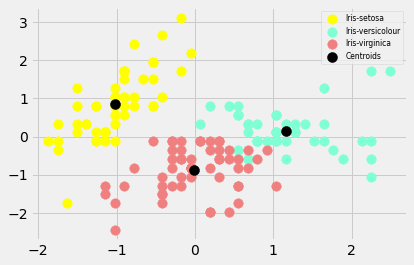

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans == 0, 1], 
            s = 90, c = 'yellow',label = 'Iris-setosa')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1], 
            s = 90, c = 'aquamarine',label = 'Iris-versicolour')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2, 1],
            s = 90, c = 'lightcoral', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black',label = 'Centroids')

plt.legend(prop={"size":7.5})